In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))
np.set_printoptions(suppress=True)





In [2]:
df_customers = pd.read_csv("dataset/customers.csv")
df_loans = pd.read_csv("dataset/loans.csv")
df_bureau = pd.read_csv("dataset/bureau_data.csv")

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [5]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,"49,340.00",444060,1973600,33,1630408,873386,24-07-2019,10-08-2019,False
1,L00002,C00002,Home,Secured,4161000,3883000,"77,660.00",698940,3106400,30,709309,464100,24-07-2019,15-08-2019,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,"43,400.00",390600,1736000,21,1562399,1476042,24-07-2019,21-08-2019,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,"34,940.00",314460,1397600,6,1257839,1031094,24-07-2019,09-08-2019,False
4,L00005,C00005,Auto,Secured,4647000,4520000,"90,400.00",813600,3616000,28,1772334,1032458,24-07-2019,02-08-2019,False


In [6]:
df = pd.merge(df_customers,df_loans, on='cust_id')
df

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,"49,340.00",444060,1973600,33,1630408,873386,24-07-2019,10-08-2019,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,"77,660.00",698940,3106400,30,709309,464100,24-07-2019,15-08-2019,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,"43,400.00",390600,1736000,21,1562399,1476042,24-07-2019,21-08-2019,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,"34,940.00",314460,1397600,6,1257839,1031094,24-07-2019,09-08-2019,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,"90,400.00",813600,3616000,28,1772334,1032458,24-07-2019,02-08-2019,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,C49996,40,F,Single,Salaried,775000,2,Owned,11,Chennai,...,535000,"10,700.00",96300,428000,22,385199,178470,22-07-2024,15-08-2024,False
49996,C49997,39,M,Single,Salaried,3117000,0,Owned,9,Kolkata,...,3243000,"64,860.00",583740,2594400,15,1656484,1040735,22-07-2024,29-07-2024,False
49997,C49998,45,F,Single,Self-Employed,1329000,0,Rented,27,Bangalore,...,3740000,"74,800.00",673200,2992000,37,912691,355461,22-07-2024,25-07-2024,False
49998,C49999,42,F,Single,Self-Employed,533000,2,Mortgage,20,Hyderabad,...,1630000,"32,600.00",293400,1304000,37,300035,179453,22-07-2024,29-07-2024,False


In [7]:
df = pd.merge(df, df_bureau)
df


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,24-07-2019,10-08-2019,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,24-07-2019,15-08-2019,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,24-07-2019,21-08-2019,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,24-07-2019,09-08-2019,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,24-07-2019,02-08-2019,False,4,2,120,0,0,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,C49996,40,F,Single,Salaried,775000,2,Owned,11,Chennai,...,22-07-2024,15-08-2024,False,4,2,165,1,6,8,24
49996,C49997,39,M,Single,Salaried,3117000,0,Owned,9,Kolkata,...,22-07-2024,29-07-2024,False,4,0,161,0,0,4,91
49997,C49998,45,F,Single,Self-Employed,1329000,0,Rented,27,Bangalore,...,22-07-2024,25-07-2024,False,4,1,42,0,0,7,38
49998,C49999,42,F,Single,Self-Employed,533000,2,Mortgage,20,Hyderabad,...,22-07-2024,29-07-2024,False,1,2,42,9,47,4,17


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [9]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [10]:
X = df.drop("default", axis="columns")
y = df['default']
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train, y_train], axis='columns')
df_test = pd.concat([X_test, y_test], axis='columns')

df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,31-10-2020,11-11-2020,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,22-10-2022,27-10-2022,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,04-12-2023,29-12-2023,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,18-06-2020,07-07-2020,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,12-11-2020,07-12-2020,1,2,60,0,0,1,71,0


In [11]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

In [12]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [13]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [14]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [15]:
df_train.residence_type.fillna(mode_residence, inplace=True)
df_train.residence_type.unique()

C:\Users\Deepak Y\AppData\Local\Temp\ipykernel_8140\2089477585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [16]:
df_test.residence_type.fillna(mode_residence, inplace=True)

C:\Users\Deepak Y\AppData\Local\Temp\ipykernel_8140\504530992.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence, inplace=True)


In [17]:
df_train.duplicated().sum()

np.int64(0)

In [18]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [19]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
                    'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
                    'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application',
                    'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type',
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

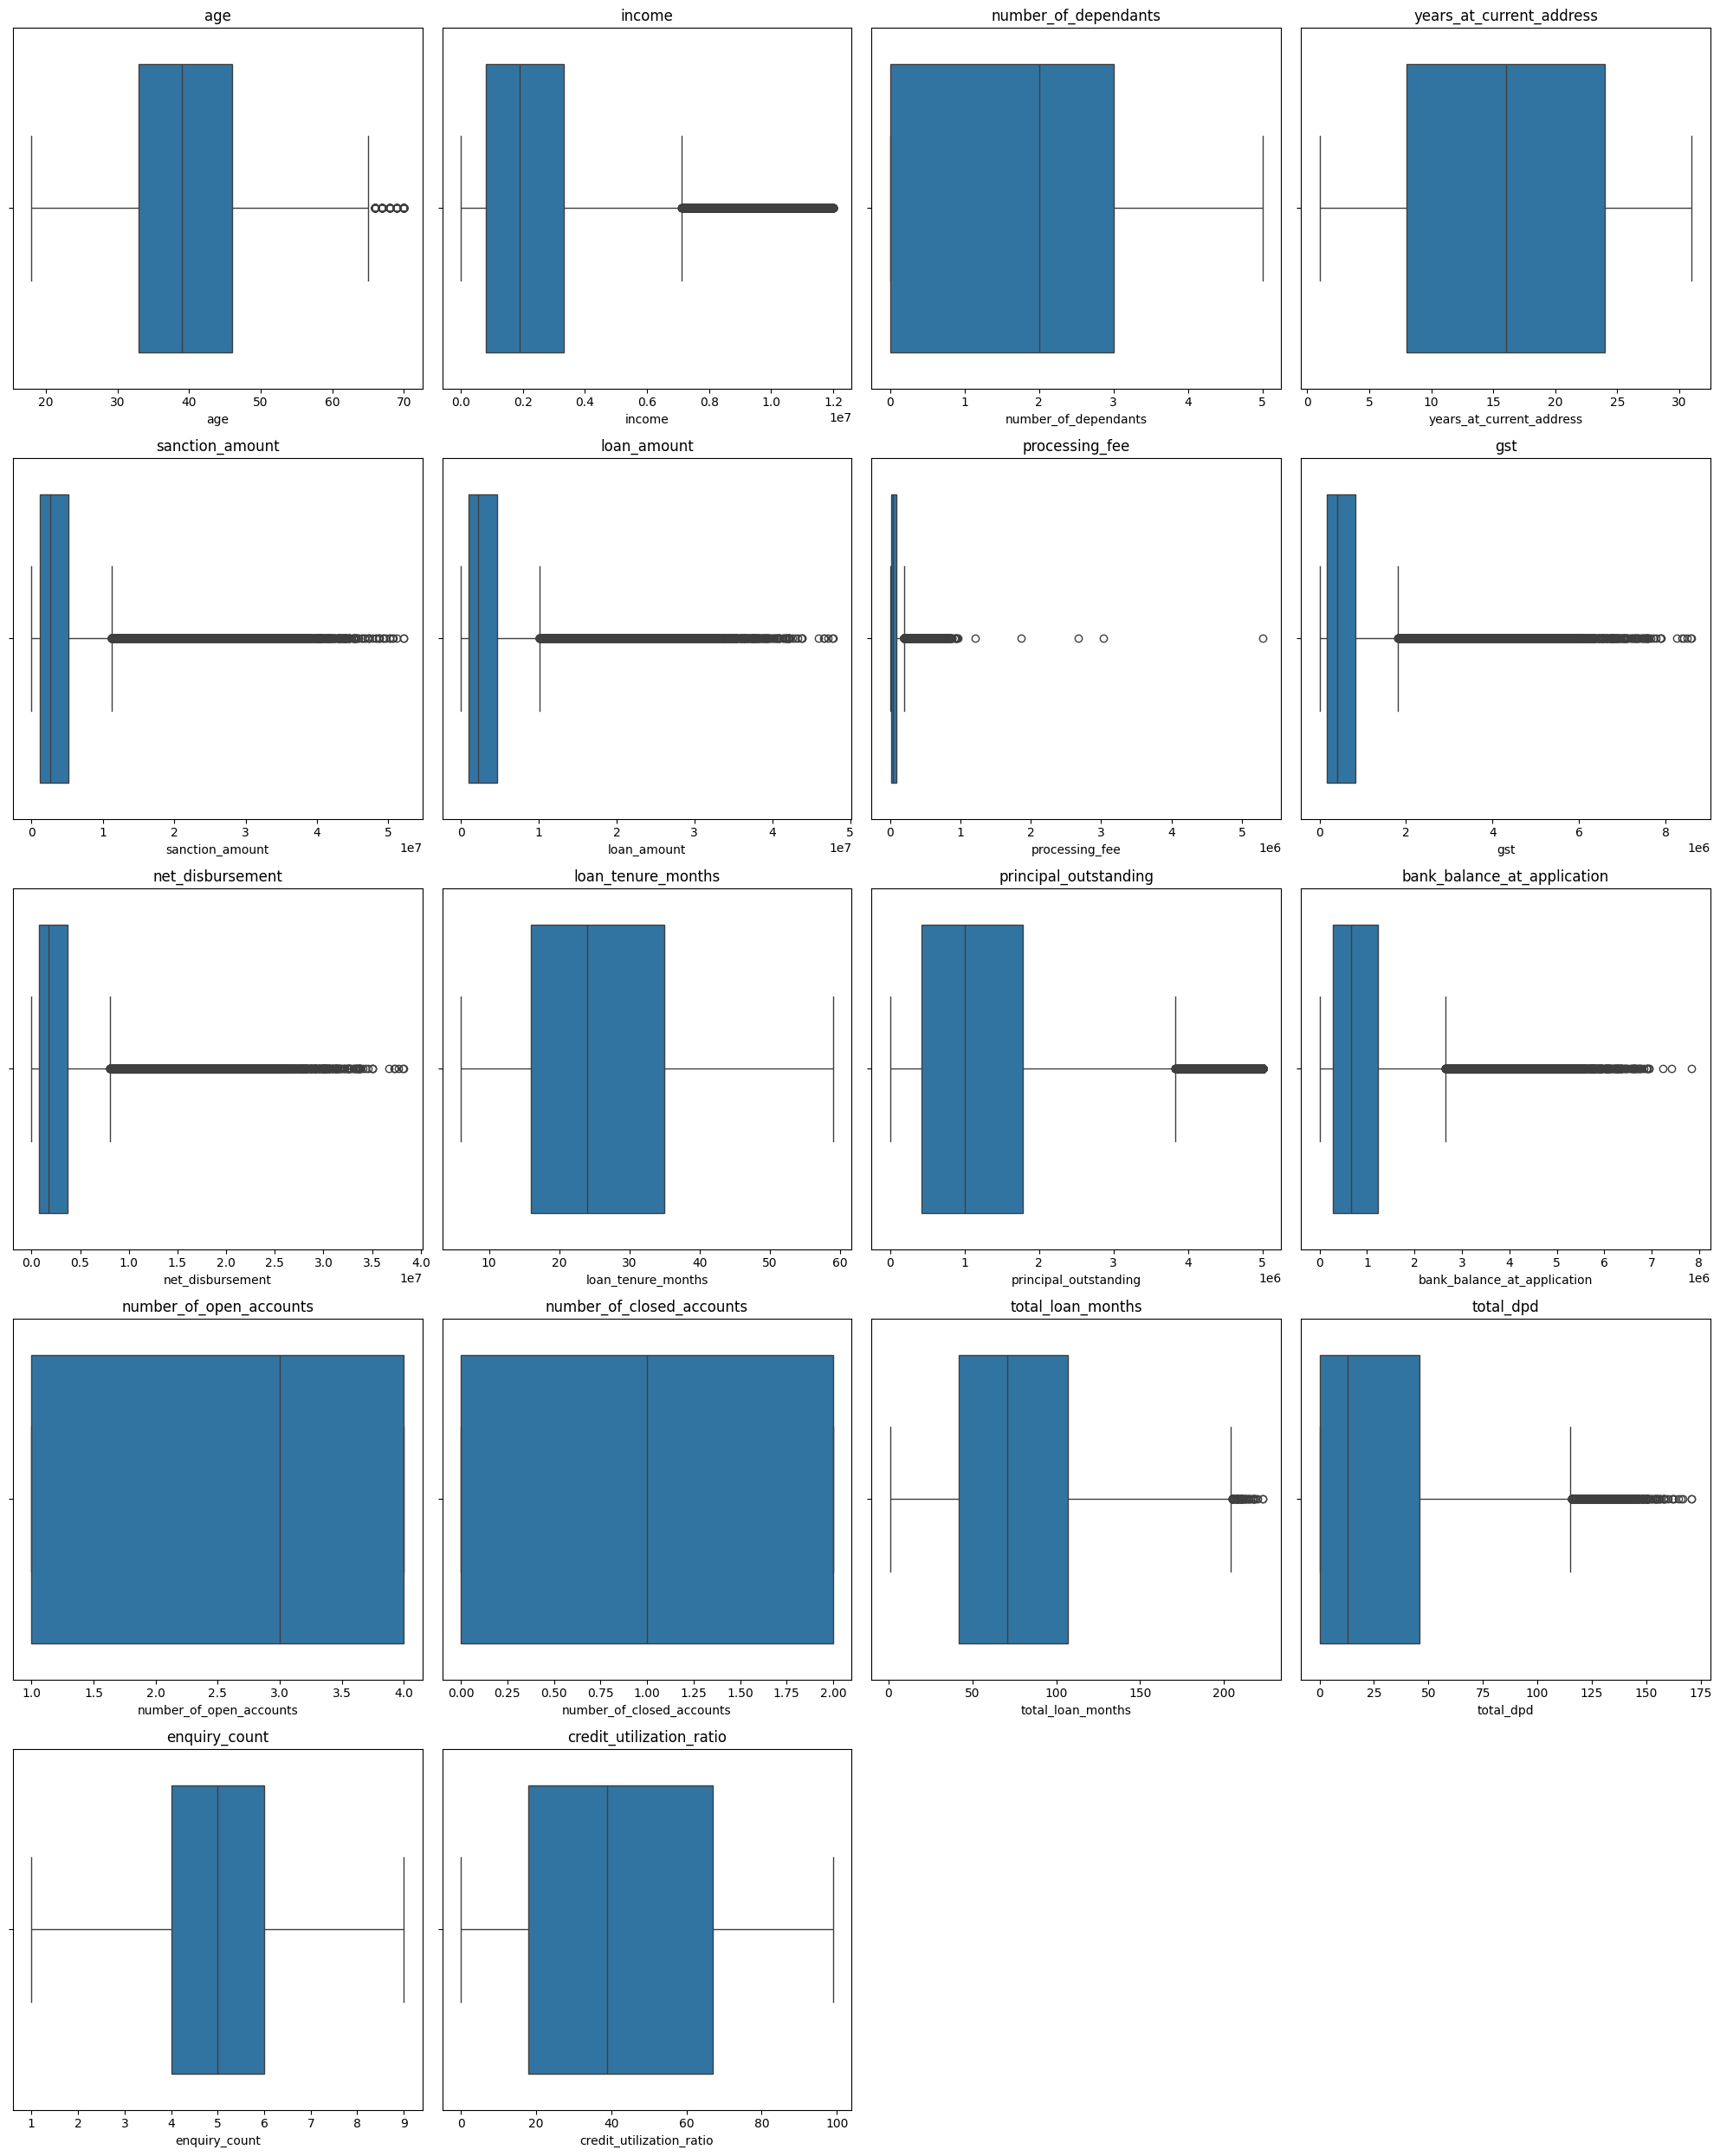

In [20]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols)
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

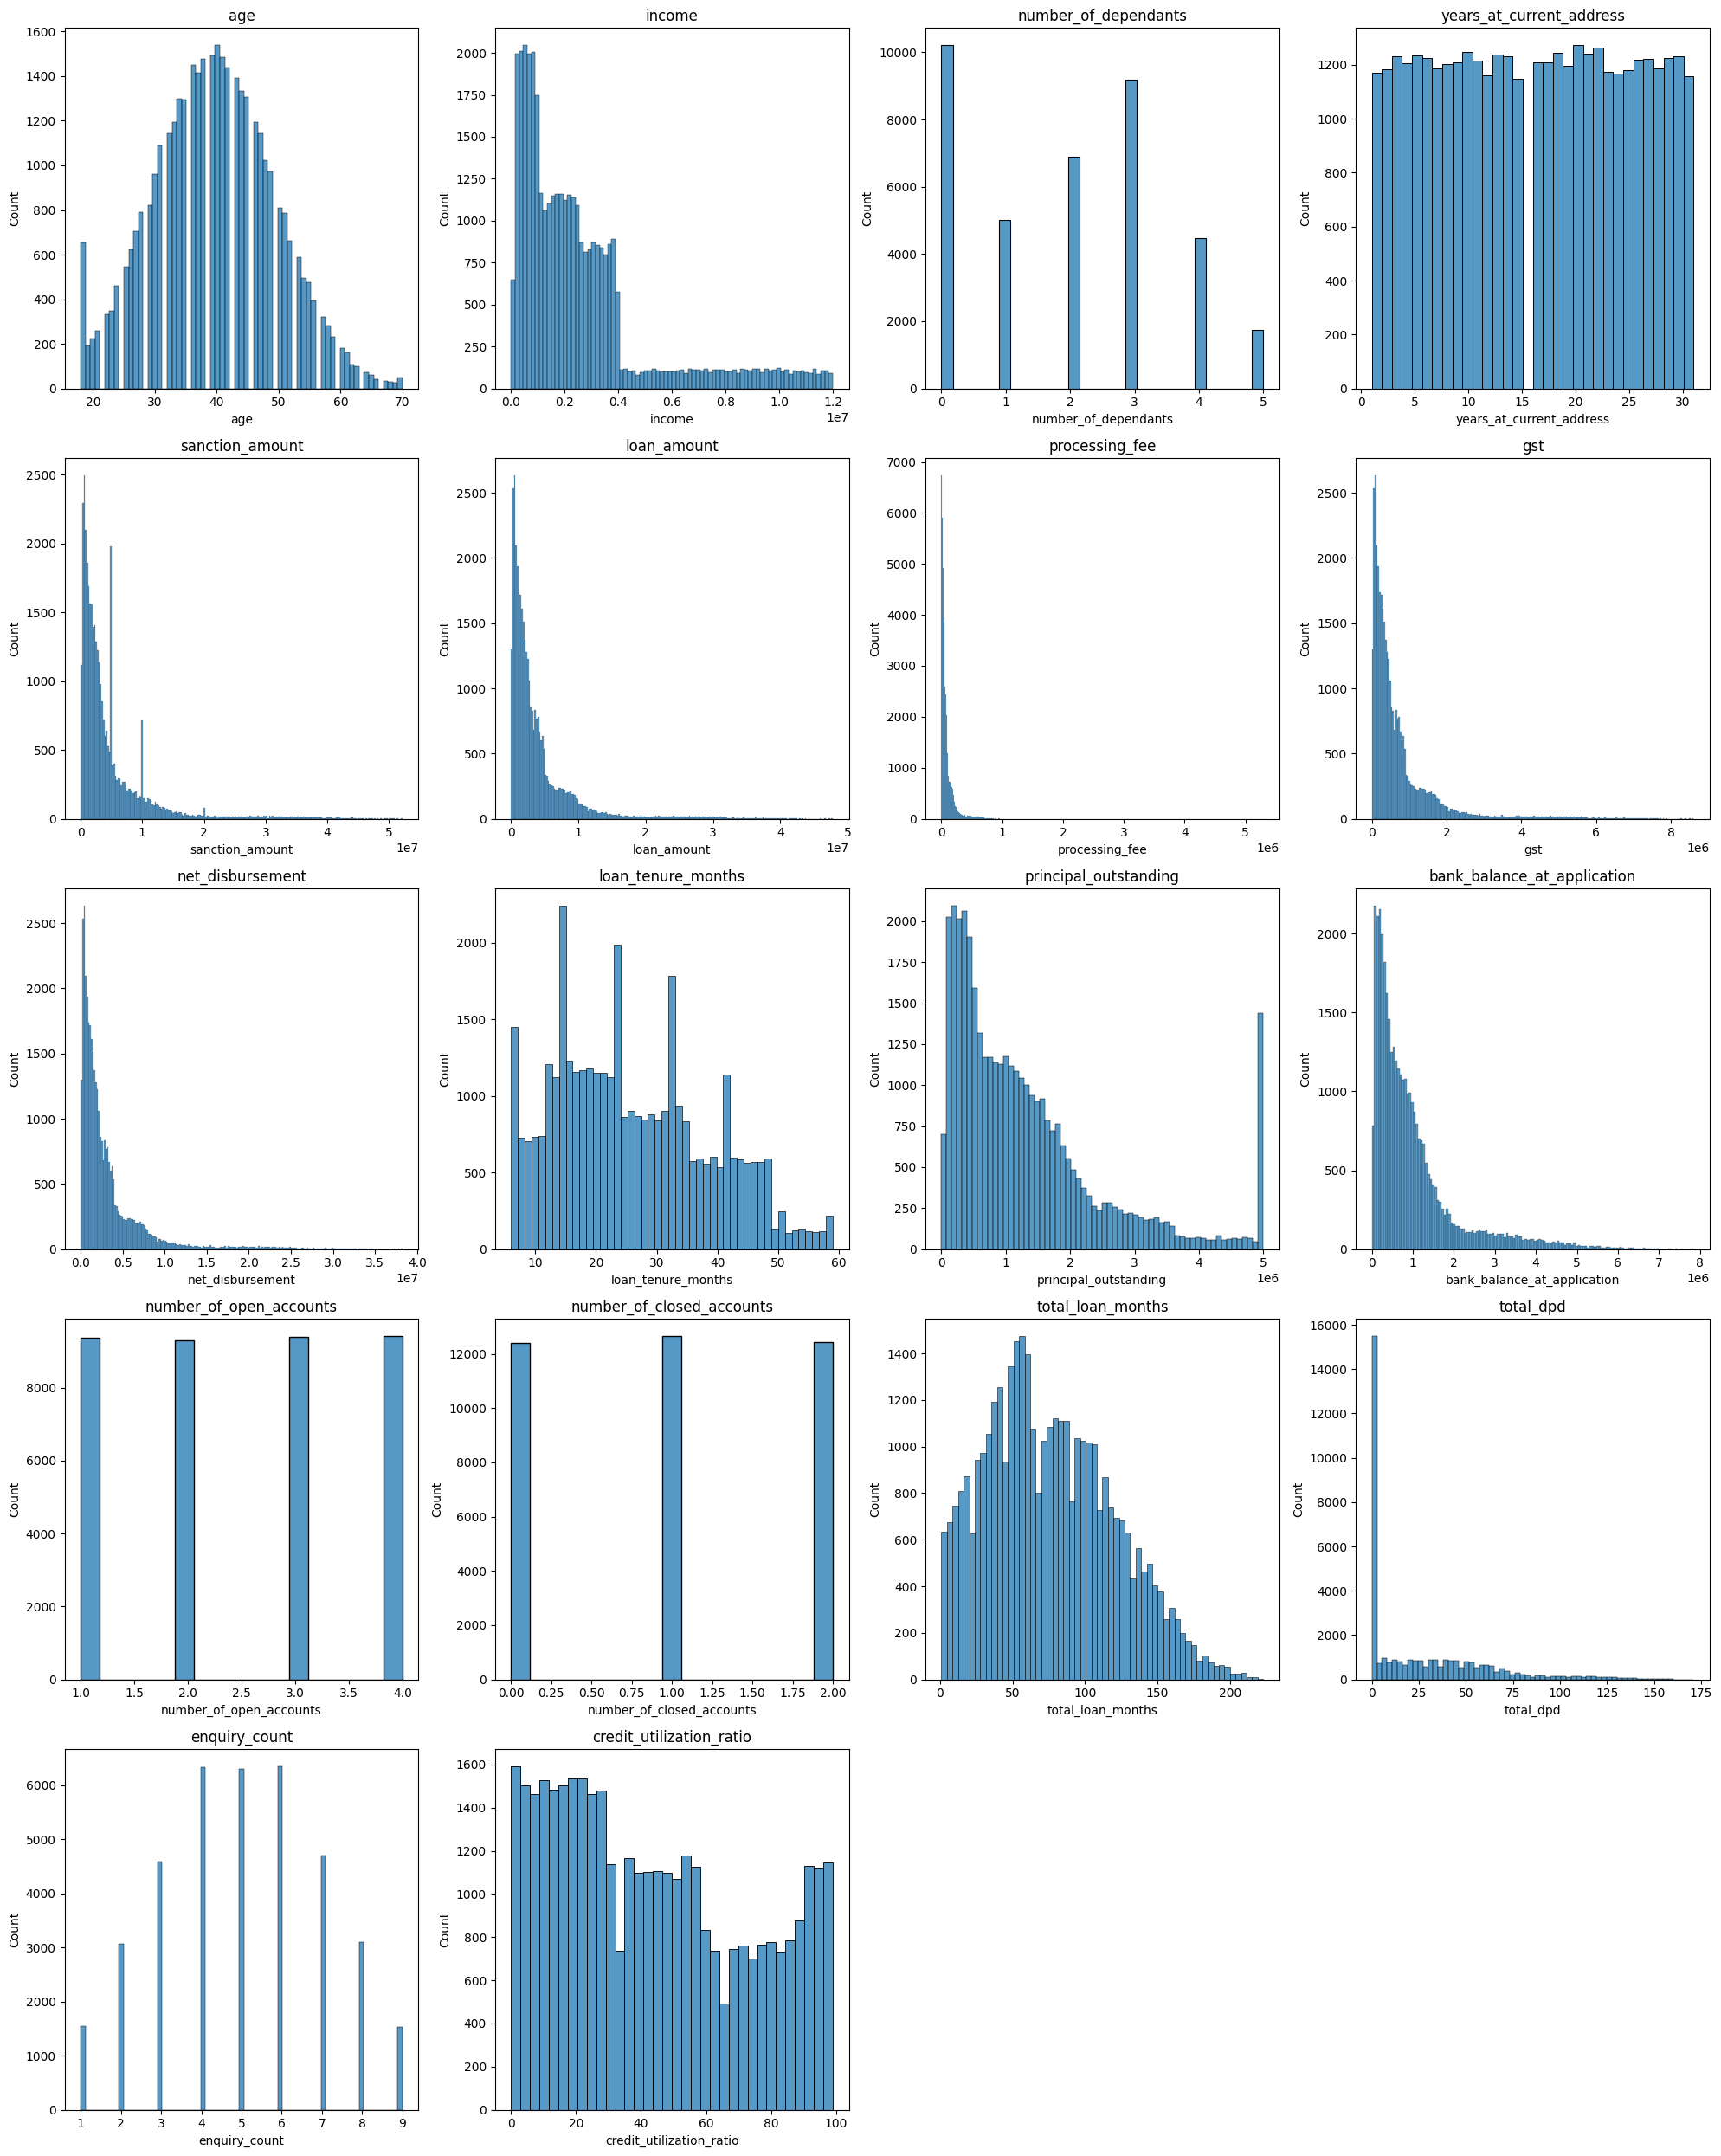

In [21]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [22]:
df_train.processing_fee.describe()

count      37,500.00
mean       80,290.68
std       113,128.14
min             0.00
25%        19,220.00
50%        44,600.00
75%        92,420.00
max     5,293,543.52
Name: processing_fee, dtype: float64

In [23]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
23981,2234000,"2,669,791.02"
28174,966000,"1,214,492.67"
47089,1738000,"1,858,964.77"
29305,2616000,"3,036,378.00"
9898,3626000,"5,293,543.52"


In [24]:
df_train_1 = df_train[(df_train.processing_fee/df_train.loan_amount)<0.03].copy()
df_train_1[(df_train_1.processing_fee/df_train_1.loan_amount)>0.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee


In [25]:
# Apply same step on test set
df_test = df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()
df_test.shape

(12497, 33)

In [26]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [27]:
for col in columns_categorical:
    print(col, "-->", df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [28]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')
df_train_1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

<h3 align="center" style="color:blue;">Exploratory Data Analysis</h3>


In [29]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

<Axes: xlabel='age', ylabel='Count'>

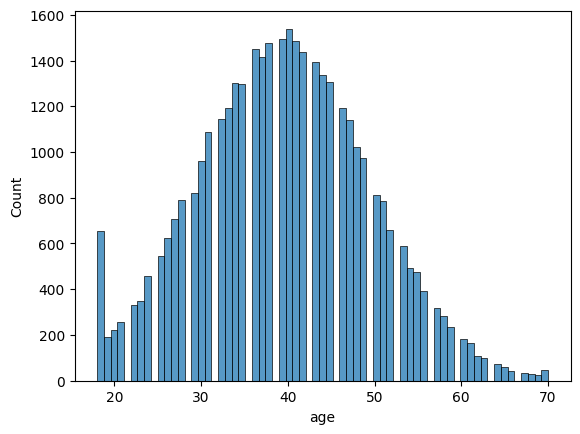

In [30]:
sns.histplot(df_train.age, fill=True)

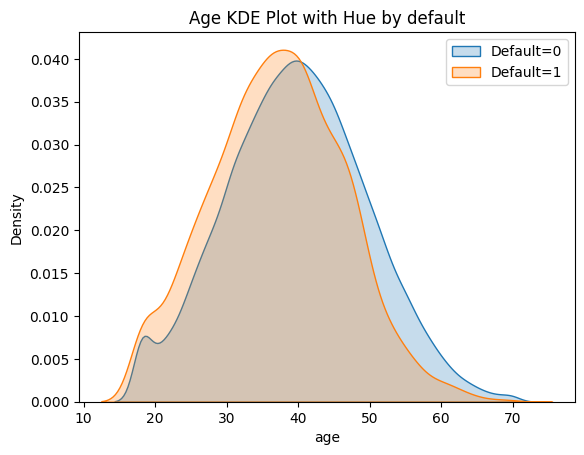

In [31]:
sns.kdeplot(df_train[df_train.default==0]['age'], fill=True, label="Default=0")
sns.kdeplot(df_train[df_train.default==1]['age'], fill=True, label="Default=1")
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

Insights:

Age and Default Risk: The orange graph (representing Default=1) is slightly shifted to the left of the blue graph (representing Default=0). This indicates that people with young age are more likely to default on their loans compared to older applicants.

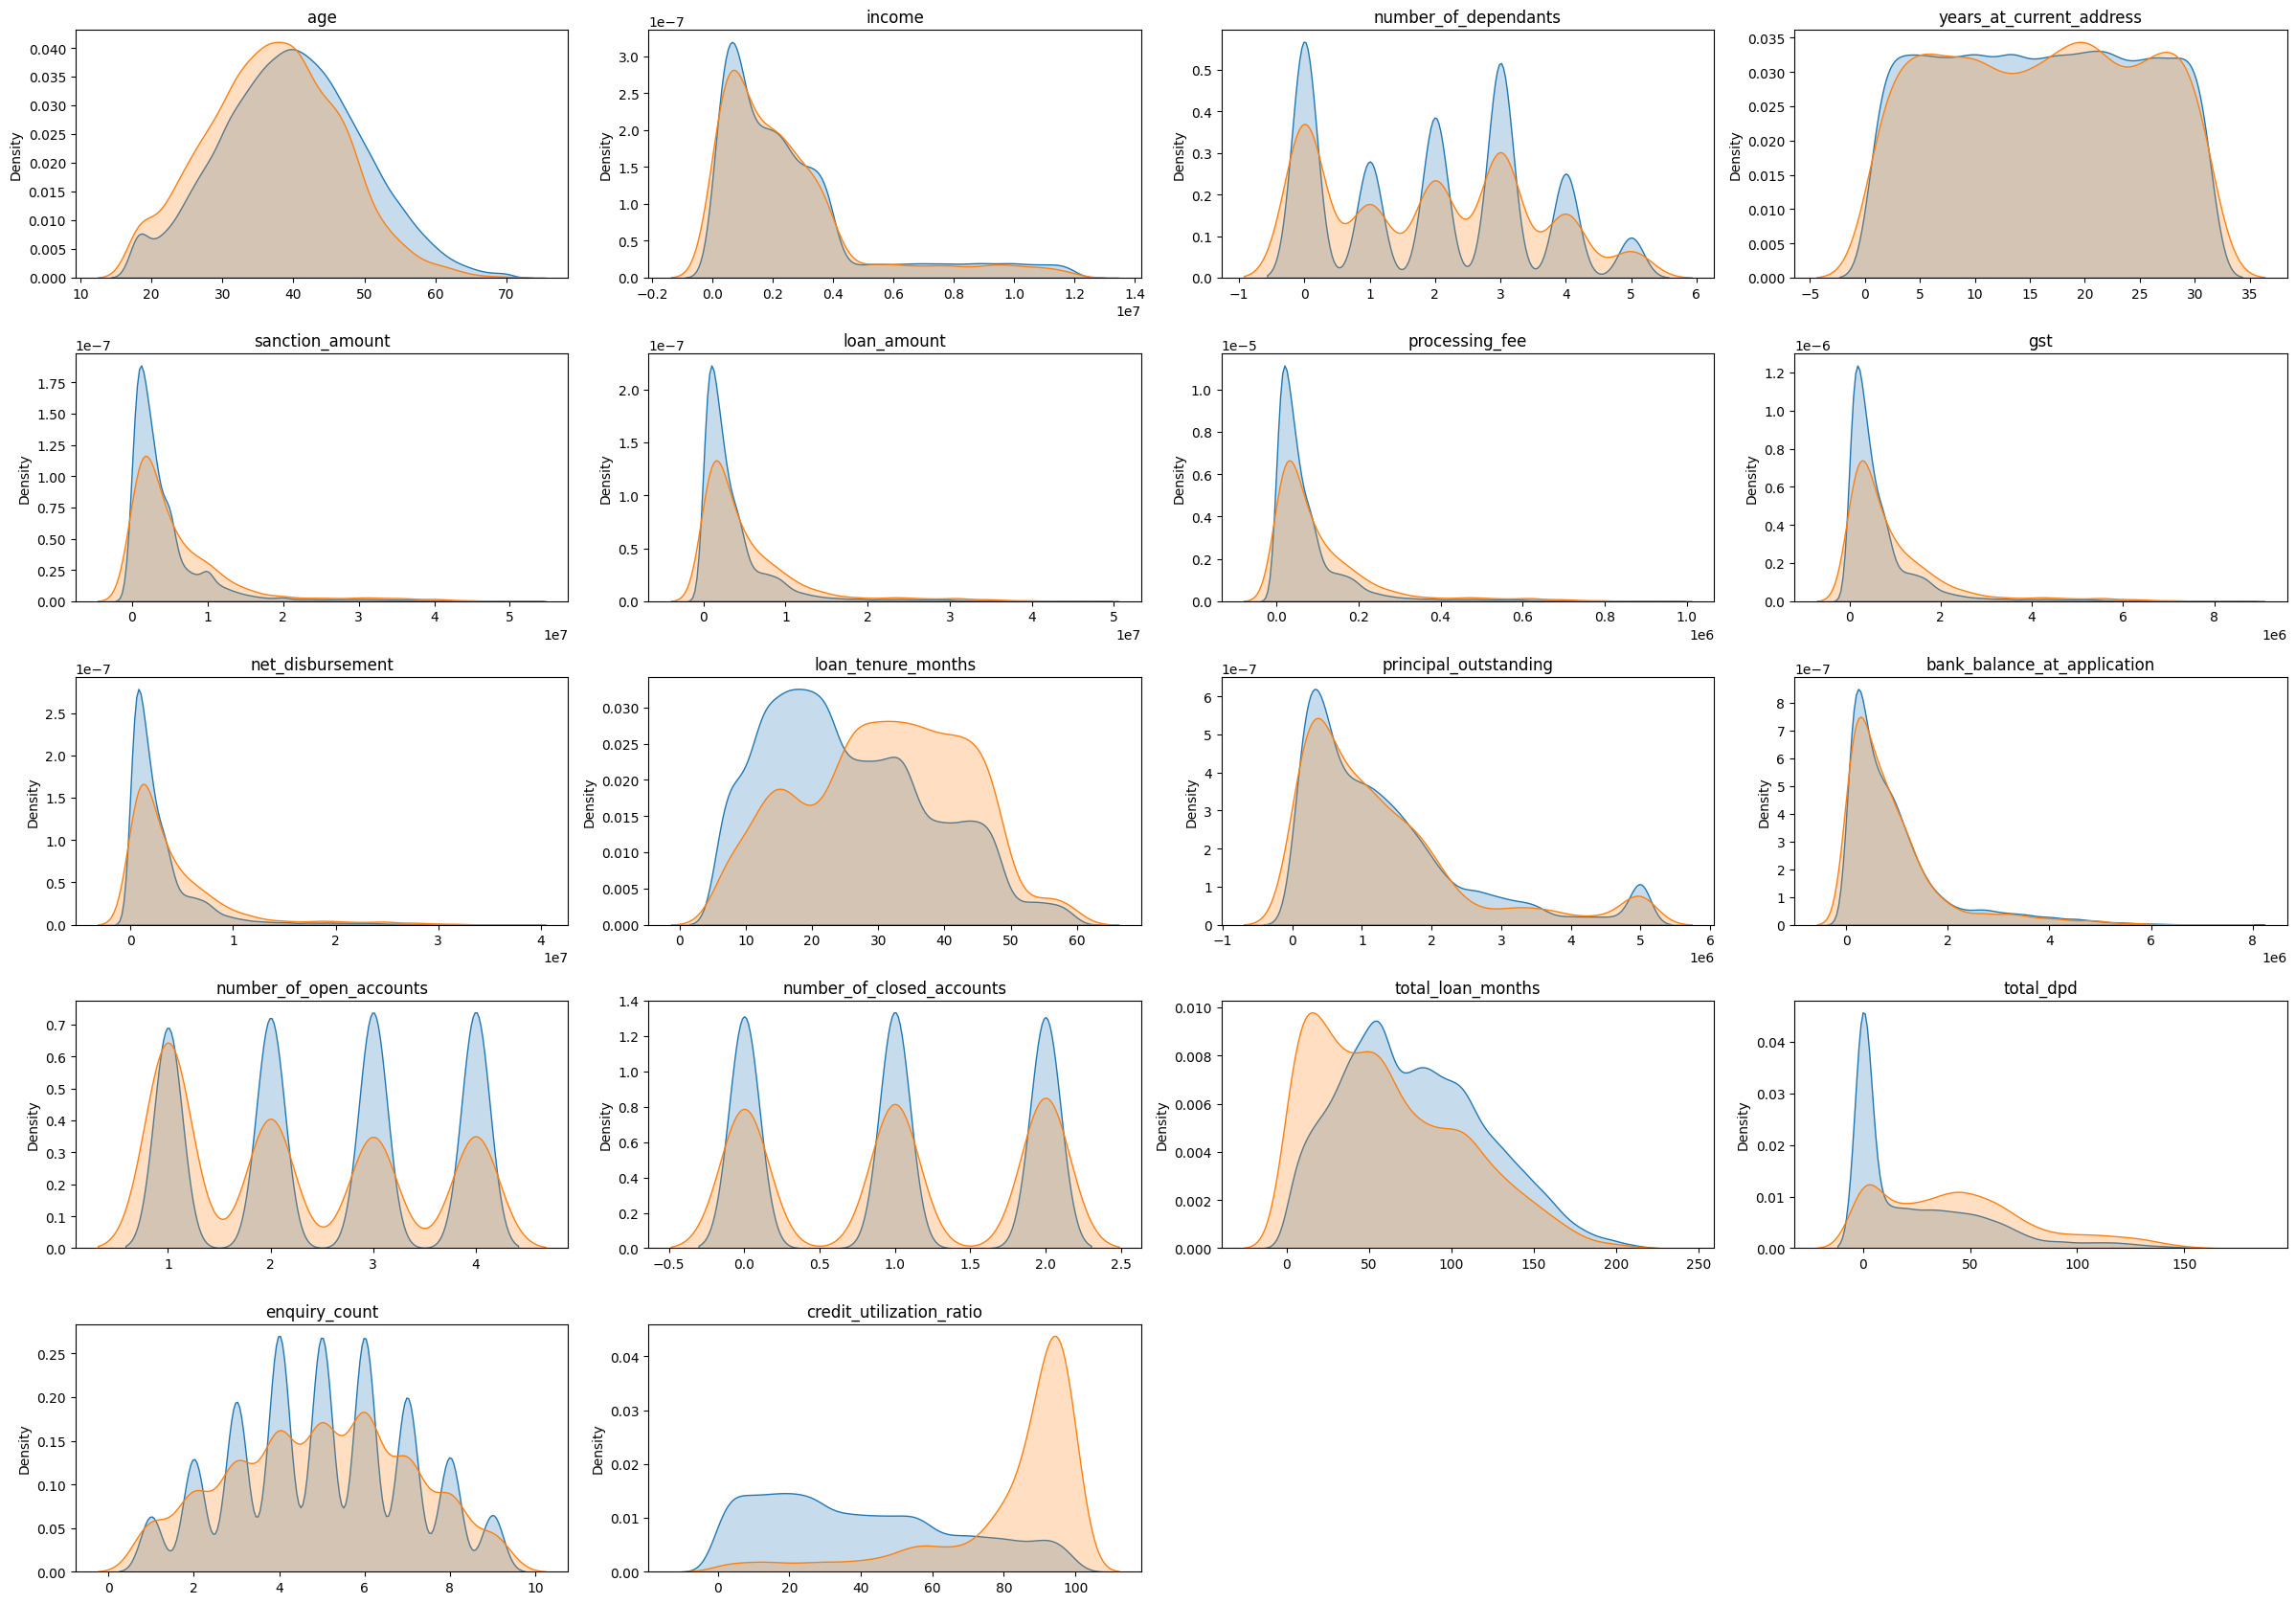

In [32]:
plt.figure(figsize=(24, 20)) # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i + 1) # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label='default=1')
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

Insights

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming defaulter, these 4 looks like strong predictors
2. In remaining columns the distributions do not give any obvious insights
3. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan_to_income ratio that may have influence on the target variable. We will explore more later

<h3 align="center" style="color:blue;">Feature Engineering</h3>


In [33]:
df_train_1["loan_to_income"] = round(df_train_1["loan_amount"]/df_train_1["income"],2)
df_test["loan_to_income"] = round(df_test["loan_amount"]/df_test["income"],2)

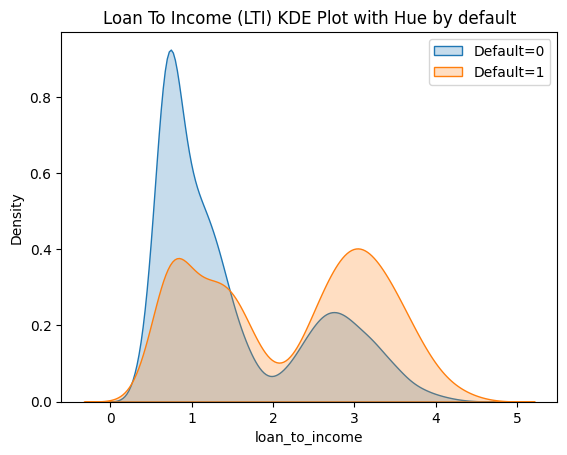

In [34]:
sns.kdeplot(df_train_1[df_train_1.default==0]['loan_to_income'], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['loan_to_income'], fill=True, label="Default=1")
plt.title(f"Loan To Income (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

In [35]:
df_train_1.columns


Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [36]:
df_train_1[["delinquent_months", "total_loan_months"]]

,delinquent_months,total_loan_months
12746,20,152
32495,10,160
43675,12,54
9040,0,76
13077,0,60
...,...,...
28515,0,40
5558,14,52
45236,11,130
49228,0,88


In [37]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months'] * 100 / df_train_1['total_loan_months']).round(1)
df_test['delinquency_ratio'] = (df_test['delinquent_months'] * 100 / df_test['total_loan_months']).round(1)
df_train_1[["delinquent_months", "total_loan_months", "delinquency_ratio"]].head(3)

,delinquent_months,total_loan_months,delinquency_ratio
12746,20,152,13.20
32495,10,160,6.20
43675,12,54,22.20


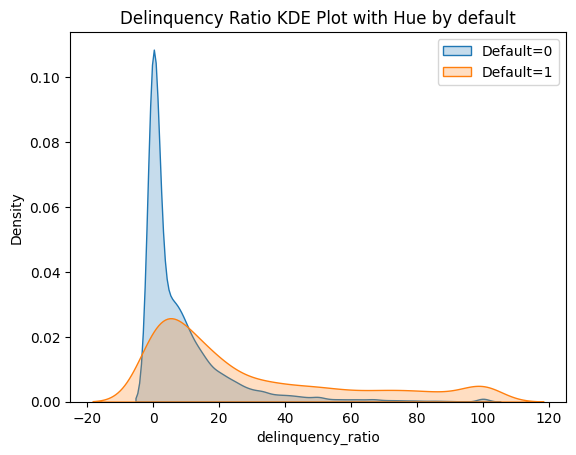

In [38]:
sns.kdeplot(df_train_1[df_train_1.default==0]['delinquency_ratio'], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['delinquency_ratio'], fill=True, label="Default=1")
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [39]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)

df_train_1['avg_dpd_per_delinquency'].describe()

count   37,488.00
mean         3.28
std          2.91
min          0.00
25%          0.00
50%          4.30
75%          5.72
max         10.00
Name: avg_dpd_per_delinquency, dtype: float64

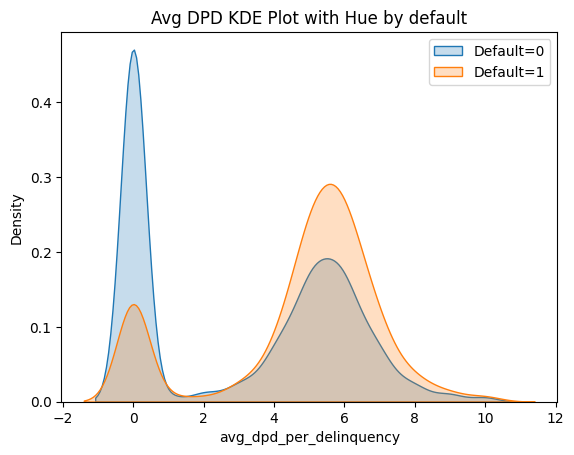

In [40]:
sns.kdeplot(df_train_1[df_train_1.default==0]['avg_dpd_per_delinquency'], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['avg_dpd_per_delinquency'], fill=True, label="Default=1")
plt.title(f"Avg DPD KDE Plot with Hue by default")
plt.legend()
plt.show()

In [41]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

<h3 align="center" style="color:blue;">Feature Selection</h3>


In [42]:
df_train_2 = df_train_1.drop(['cust_id','loan_id'], axis='columns')
df_test = df_test.drop(['cust_id','loan_id'], axis='columns')
df_train_2.columns

Index(['age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [43]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis='columns')
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                        'total_loan_months', 'delinquent_months', 'total_dpd'], axis='columns')
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [44]:
df_train_3.info

<bound method DataFrame.info of        age gender marital_status employment_status  number_of_dependants  \
12746   59      M        Married     Self-Employed                     3   
32495   44      F         Single          Salaried                     0   
43675   38      M         Single          Salaried                     0   
9040    42      M        Married          Salaried                     2   
13077   58      M        Married     Self-Employed                     4   
...    ...    ...            ...               ...                   ...   
28515   70      M         Single     Self-Employed                     0   
5558    39      F         Single          Salaried                     0   
45236   39      M        Married     Self-Employed                     4   
49228   33      M         Single          Salaried                     2   
37784   31      F         Single          Salaried                     1   

      residence_type  years_at_current_address       ci

In [45]:
df_train_3.select_dtypes(["int64","float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [46]:
df_train_3.columns = df_train_3.columns.str.strip()

In [47]:
# 1. Setup X_train and y_train
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

# 2. Get columns to scale from the FEATURES DataFrame (X_train)
#    This ensures 'default' is not included in the list.
cols_to_scale = X_train.select_dtypes(["int64", "float64"]).columns

scaler = MinMaxScaler()

# 3. Apply the scaling
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,"37,488.00","37,488.00","37,488.00","37,488.00","37,488.00","37,488.00","37,488.00","37,488.00","37,488.00","37,488.00","37,488.00","37,488.00","37,488.00","37,488.00","37,488.00","37,488.00","37,488.00","37,488.00"
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [48]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,"12,497.00","12,497.00","12,497.00","12,497.00","12,497.00","12,497.00","12,497.00","12,497.00","12,497.00","12,497.00","12,497.00","12,497.00","12,497.00","12,497.00","12,497.00","12,497.00","12,497.00","12,497.00"
mean,0.42,0.38,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,0.76,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [49]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df


In [50]:
calculate_vif(X_train[cols_to_scale])

C:\Users\Deepak Y\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.09
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.18
9,principal_outstanding,16.33


In [51]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'principal_outstanding']

X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [52]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.43
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.78
4,loan_tenure_months,6.02
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.35
7,number_of_closed_accounts,2.37
8,enquiry_count,6.38
9,credit_utilization_ratio,2.92


In [53]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

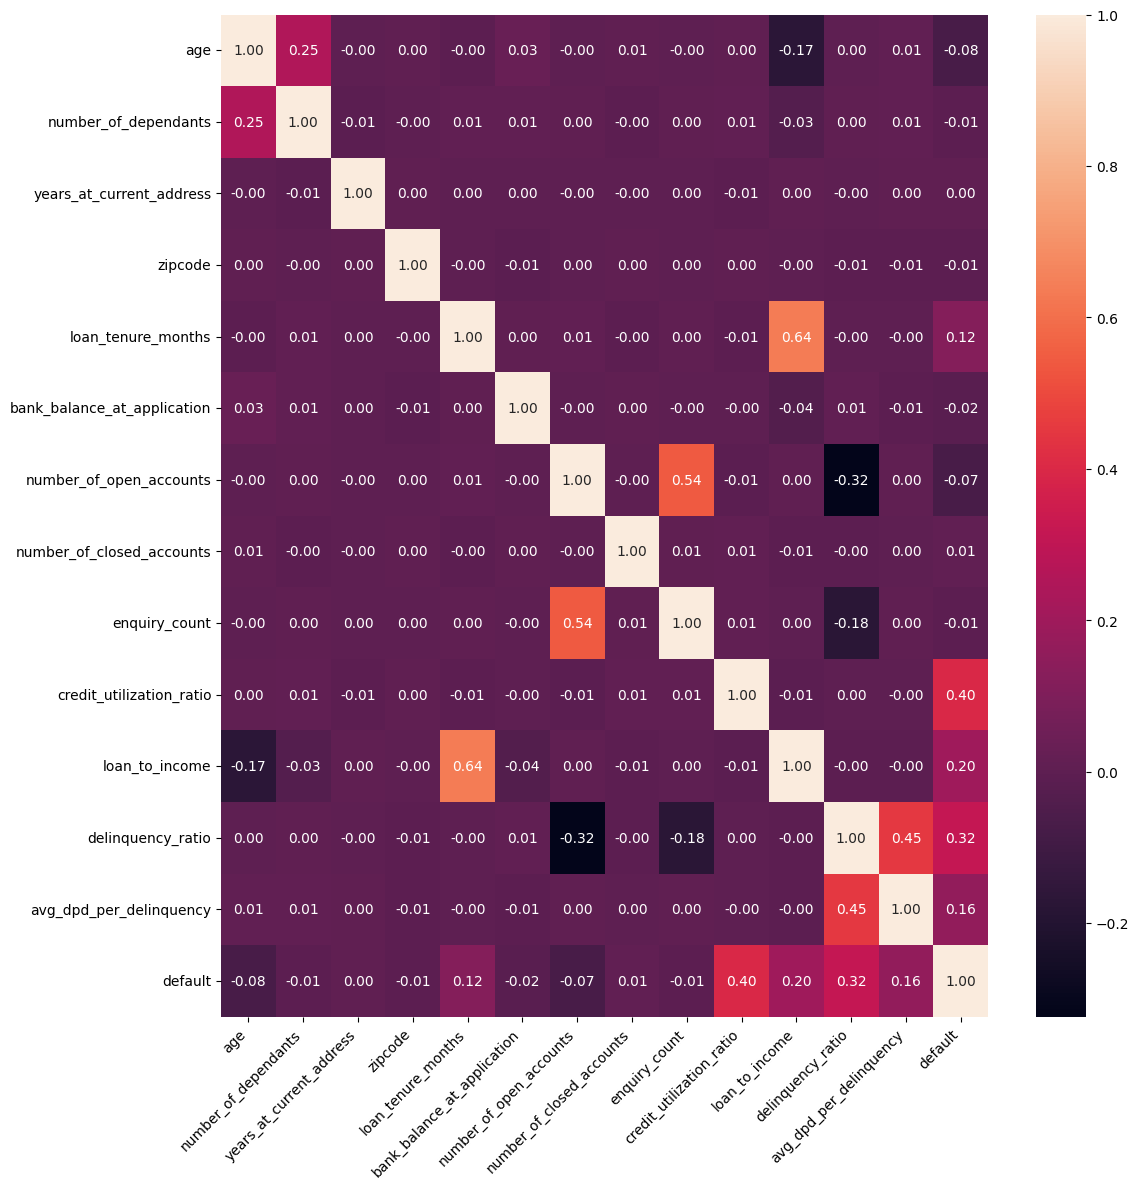

In [54]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [55]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [56]:
temp = pd.concat([X_train_1, y_train], axis=1)
temp.groupby('loan_purpose')['default'].agg(['count', 'sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


In [57]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad'] = grouped['total'] - grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()

    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log((grouped['good_pct'] + 1e-10) / (grouped['bad_pct'] + 1e-10))
    grouped['iv'] = (grouped['good_pct'] - grouped['bad_pct']) * grouped['woe']

    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    total_iv = grouped['iv'].sum()

    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train], axis=1), 'loan_purpose', 'default')
grouped


,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [58]:
X_train_1.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [59]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        # NOTE: Using tuple unpacking to correctly get the total_iv
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train], axis=1), feature, 'default')
    else:
        # Bin numeric features before calculating IV
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        
        # NOTE: Using tuple unpacking to correctly get the total_iv
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train], axis=1), feature, 'default')
        
    iv_values[feature] = iv

iv_values

{'age': np.float64(0.08906894592718781),
 'gender': np.float64(0.00047449502160691365),
 'marital_status': np.float64(0.0011297668451608282),
 'employment_status': np.float64(0.003953046300819111),
 'number_of_dependants': np.float64(0.0019380899124082365),
 'residence_type': np.float64(0.24674526863939697),
 'years_at_current_address': np.float64(0.0020800513584885473),
 'city': np.float64(0.0019059578690478222),
 'state': np.float64(0.0019005589787532066),
 'zipcode': np.float64(0.00166774132273191),
 'loan_purpose': np.float64(0.3691197840810805),
 'loan_type': np.float64(0.16319324898891158),
 'loan_tenure_months': np.float64(0.21893515068685399),
 'bank_balance_at_application': np.float64(0.006318798797039932),
 'number_of_open_accounts': np.float64(0.08463134079836915),
 'number_of_closed_accounts': np.float64(0.0011964272588846257),
 'enquiry_count': np.float64(0.007864214072698179),
 'credit_utilization_ratio': np.float64(2.35296556470774),
 'loan_to_income': np.float64(0.47641

In [60]:
pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x))
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [61]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

<h3 align="center" style="color:blue;">Feature Encoding</h3>

In [62]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [63]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.788,Owned,Home,Secured,0.415,1.000,0.364,0.415,0.132,0.590
32495,0.500,Owned,Education,Secured,0.830,0.667,0.051,0.307,0.062,0.620
43675,0.385,Mortgage,Home,Secured,0.491,0.000,0.000,0.759,0.222,0.560
9040,0.462,Mortgage,Education,Secured,0.642,0.667,0.879,0.194,0.000,0.000
13077,0.769,Owned,Personal,Unsecured,0.170,0.000,0.717,0.047,0.000,0.000


In [64]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)

X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False


<h3 align="center" style="color:blue;">Feature Encoding</h3>

## **Attempt 1**

1. Logistic Regression, RandomForest & XGB
2. No handling of class imblance

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [66]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.71      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [67]:
from xgboost import XGBClassifier


model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.76      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.87      0.89     12497
weighted avg       0.96      0.97      0.96     12497



In [68]:
from sklearn.model_selection import RandomizedSearchCV


# Assuming X_train_encoded, y_train, X_test_encoded, and y_test are defined earlier

param_dist = {
    # Logarithmically spaced values from 10^-4 to 10^4
    'C': np.logspace(-4, 4, 20),
    # Algorithm to use in the optimization problem
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']
}

# Create the Logistic Regression model
# Increased max_iter for convergence
log_reg = LogisticRegression(max_iter=10000)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50, # Number of parameter settings that are sampled
    scoring='f1',
    cv=3, # 3-fold cross-validation
    verbose=2,
    random_state=42, # Set a random state for reproducibility
    n_jobs=-1 # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

# best_model = random_search.best_estimator_
y_pred = random_search.predict(X_test_encoded) # Use random_search.predict for the best estimator's prediction

# Print the Classification Report
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'liblinear', 'C': np.float64(1438.44988828766)}
Best Score: 0.7578820896729832
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [69]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV


# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0], # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0] # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7883672970285227
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.83      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.97      0.96      0.96     12497



## **Attempt 2**

1. Logistic Regression & XGB  
2. Handle Class Imbalance Using Under Sampling


In [70]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)
y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [71]:
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [72]:

model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.99      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



## **Attempt 3**

1. Logistic Regression
2. Handle Class Imbalance Using SMOTE Tomek
3. Parameter tunning using optuna


In [73]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34195
1    34195
Name: count, dtype: int64

In [74]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [75]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space using Optuna suggestions
    param = {
        # Logarithmically spaced values for the regularization inverse
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),
        # Solvers for the optimization problem
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),
        # Logarithmically spaced values for the stopping tolerance
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),
        # Class weights to handle imbalance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])
    }
    
    # Initialize the Logistic Regression model with suggested parameters
    # Note: max_iter is passed outside the param dictionary as it's fixed
    model = LogisticRegression(**param, max_iter=10000)
    
    # Create an f1 scorer, averaged by 'macro' (since it was used in previous code)
    f1_scorer = make_scorer(f1_score, average='macro')
    
    # Calculate the cross-validated f1_score
    # NOTE: X_train_smt and y_train_smt are assumed to be the resampled data
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    # Optuna needs a single value to minimize or maximize (default is minimize)
    # We want to maximize the F1 score, so we return the mean of the scores
    return np.mean(scores)

# Create an Optuna study object
# direction='maximize' tells Optuna to find the highest mean F1 score
study_logistic = optuna.create_study(direction='maximize')

# Run the optimization for 50 trials
study_logistic.optimize(objective, n_trials=50)

# The following lines are usually added after optimization to print the results
# print("Best trial:")
# print(f"  Value: {study_logistic.best_trial.value:.4f}")
# print(f"  Params: {study_logistic.best_trial.params}")

[I 2025-11-14 13:07:17,278] A new study created in memory with name: no-name-5ab12f71-384e-4442-9f81-76bdea07d4a2
[I 2025-11-14 13:07:17,358] Trial 0 finished with value: 0.945622365342841 and parameters: {'C': 348.25110990791615, 'solver': 'saga', 'tol': 0.017419031773073995, 'class_weight': None}. Best is trial 0 with value: 0.945622365342841.
[I 2025-11-14 13:07:17,477] Trial 1 finished with value: 0.9457908980954466 and parameters: {'C': 12.091637466815847, 'solver': 'liblinear', 'tol': 0.03144244499547304, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9457908980954466.
[I 2025-11-14 13:07:17,663] Trial 2 finished with value: 0.9436023268545427 and parameters: {'C': 0.3523080273551468, 'solver': 'liblinear', 'tol': 5.0562796452425016e-05, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9457908980954466.
[I 2025-11-14 13:07:17,736] Trial 3 finished with value: 0.9112730705841153 and parameters: {'C': 0.0015260476501557604, 'solver': 'lbfgs', 'tol': 0.00014628

In [76]:
print('Best trial:')
trial = study_logistic.best_trial
print('F1-score: {}'.format(trial.value))
print('Params: ')
for key, value in trial.params.items():
    print(' {}: {}'.format(key, value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

Best trial:
F1-score: 0.9457945019208082
Params: 
 C: 5.4598750538006575
 solver: liblinear
 tol: 0.004297704300764633
 class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



## **Attempt 4**

1. XGBoost
2. Handle Class Imbalance Using SMOTE Tomek
3. Parameter tunning using optuna


In [77]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-11-14 13:07:24,083] A new study created in memory with name: no-name-08a587b2-d8aa-478c-8562-695d7f8d7e6a
[I 2025-11-14 13:07:24,607] Trial 0 finished with value: 0.9496704439970017 and parameters: {'lambda': 0.0014015710812276183, 'alpha': 0.1505438236262617, 'subsample': 0.43213909289522057, 'colsample_bytree': 0.6289851218160234, 'max_depth': 3, 'eta': 0.26966612509372095, 'gamma': 7.362295535109032, 'scale_pos_weight': 8.005412571950531, 'min_child_weight': 4, 'max_delta_step': 7}. Best is trial 0 with value: 0.9496704439970017.
[I 2025-11-14 13:07:25,132] Trial 1 finished with value: 0.963008382863357 and parameters: {'lambda': 0.9990804005360906, 'alpha': 0.07311920410166221, 'subsample': 0.48884000565369995, 'colsample_bytree': 0.6881641760559993, 'max_depth': 3, 'eta': 0.22094280458689125, 'gamma': 9.256841625780844, 'scale_pos_weight': 1.037082832489849, 'min_child_weight': 4, 'max_delta_step': 5}. Best is trial 1 with value: 0.963008382863357.
[I 2025-11-14 13:07:26,0

In [78]:
print("Best trial:")
trial = study_xgb.best_trial

print(f"F1-score: {trial.value}")
print("Params:")
for key, value in trial.params.items():
    print(f"  {key}: {value}")

# Extract best hyperparameters
best_params = study_xgb.best_params

# Train XGBoost with best parameters
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Predict on test set
y_pred = best_model_xgb.predict(X_test_encoded)

# Classification report
report = classification_report(y_test, y_pred)
print(report)


Best trial:
F1-score: 0.9748434613910529
Params:
  lambda: 0.05520471177656782
  alpha: 1.108812282713695
  subsample: 0.6344540788631428
  colsample_bytree: 0.5410367401410836
  max_depth: 9
  eta: 0.20138761161251847
  gamma: 1.1361756257773217
  scale_pos_weight: 2.052261053986289
  min_child_weight: 5
  max_delta_step: 6
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11423
           1       0.71      0.87      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.85      0.92      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [79]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [80]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities)
fpr[:10], tpr[:10], thresholds[:10]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754,
        0.00017509, 0.00017509, 0.00026263, 0.00026263, 0.00035017]),
 array([0.        , 0.0009311 , 0.16108007, 0.16108007, 0.17690875,
        0.17690875, 0.21973929, 0.21973929, 0.22905028, 0.22905028]),
 array([       inf, 1.        , 0.99939812, 0.99939284, 0.99927024,
        0.99925172, 0.99863557, 0.99863315, 0.99833829, 0.99832719]))

In [81]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.9836692966964784

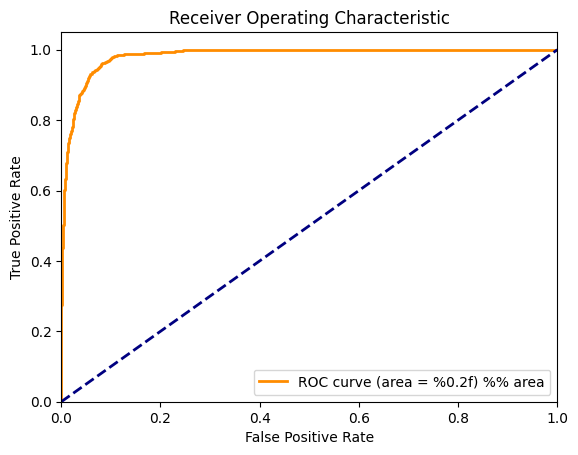

In [82]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f) %% area')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### **Model Evaluation: Rankorder & KS Statistic**


In [91]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:, 1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.535
15514,0,0.000
30367,0,0.006


In [92]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.535,8
15514,0,0.000,2
30367,0,0.006,6


In [98]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\Deepak Y\AppData\Local\Temp\ipykernel_8140\4037021561.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,"1,250.000"
1,1,0.000,0.000,0.000,"1,250.000"
2,2,0.000,0.000,0.000,"1,249.000"
3,3,0.000,0.000,0.000,"1,250.000"
4,4,0.000,0.001,0.000,"1,250.000"
5,5,0.001,0.005,0.000,"1,249.000"
6,6,0.005,0.031,5.000,"1,245.000"
7,7,0.031,0.218,9.000,"1,240.000"
8,8,0.218,0.818,162.000,"1,088.000"
9,9,0.818,1.000,898.000,352.000


In [99]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,"1,250.000",0.000,100.000
1,1,0.000,0.000,0.000,"1,250.000",0.000,100.000
2,2,0.000,0.000,0.000,"1,249.000",0.000,100.000
3,3,0.000,0.000,0.000,"1,250.000",0.000,100.000
4,4,0.000,0.001,0.000,"1,250.000",0.000,100.000
5,5,0.001,0.005,0.000,"1,249.000",0.000,100.000
6,6,0.005,0.031,5.000,"1,245.000",0.400,99.600
7,7,0.031,0.218,9.000,"1,240.000",0.721,99.279
8,8,0.218,0.818,162.000,"1,088.000",12.960,87.040
9,9,0.818,1.000,898.000,352.000,71.840,28.160


In [101]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.818,1.000,898.000,352.000,71.840,28.160
1,8,0.218,0.818,162.000,"1,088.000",12.960,87.040
2,7,0.031,0.218,9.000,"1,240.000",0.721,99.279
3,6,0.005,0.031,5.000,"1,245.000",0.400,99.600
4,5,0.001,0.005,0.000,"1,249.000",0.000,100.000
5,4,0.000,0.001,0.000,"1,250.000",0.000,100.000
6,3,0.000,0.000,0.000,"1,250.000",0.000,100.000
7,2,0.000,0.000,0.000,"1,249.000",0.000,100.000
8,1,0.000,0.000,0.000,"1,250.000",0.000,100.000
9,0,0.000,0.000,0.000,"1,250.000",0.000,100.000


In [102]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.818,1.000,898.000,352.000,71.840,28.160,898.000,352.000
1,8,0.218,0.818,162.000,"1,088.000",12.960,87.040,"1,060.000","1,440.000"
2,7,0.031,0.218,9.000,"1,240.000",0.721,99.279,"1,069.000","2,680.000"
3,6,0.005,0.031,5.000,"1,245.000",0.400,99.600,"1,074.000","3,925.000"
4,5,0.001,0.005,0.000,"1,249.000",0.000,100.000,"1,074.000","5,174.000"
5,4,0.000,0.001,0.000,"1,250.000",0.000,100.000,"1,074.000","6,424.000"
6,3,0.000,0.000,0.000,"1,250.000",0.000,100.000,"1,074.000","7,674.000"
7,2,0.000,0.000,0.000,"1,249.000",0.000,100.000,"1,074.000","8,923.000"
8,1,0.000,0.000,0.000,"1,250.000",0.000,100.000,"1,074.000","10,173.000"
9,0,0.000,0.000,0.000,"1,250.000",0.000,100.000,"1,074.000","11,423.000"


In [103]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.818,1.000,898.000,352.000,71.840,28.160,898.000,352.000,83.613,3.082
1,8,0.218,0.818,162.000,"1,088.000",12.960,87.040,"1,060.000","1,440.000",98.696,12.606
2,7,0.031,0.218,9.000,"1,240.000",0.721,99.279,"1,069.000","2,680.000",99.534,23.461
3,6,0.005,0.031,5.000,"1,245.000",0.400,99.600,"1,074.000","3,925.000",100.000,34.361
4,5,0.001,0.005,0.000,"1,249.000",0.000,100.000,"1,074.000","5,174.000",100.000,45.295
5,4,0.000,0.001,0.000,"1,250.000",0.000,100.000,"1,074.000","6,424.000",100.000,56.237
6,3,0.000,0.000,0.000,"1,250.000",0.000,100.000,"1,074.000","7,674.000",100.000,67.180
7,2,0.000,0.000,0.000,"1,249.000",0.000,100.000,"1,074.000","8,923.000",100.000,78.114
8,1,0.000,0.000,0.000,"1,250.000",0.000,100.000,"1,074.000","10,173.000",100.000,89.057
9,0,0.000,0.000,0.000,"1,250.000",0.000,100.000,"1,074.000","11,423.000",100.000,100.000


In [104]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.818,1.000,898.000,352.000,71.840,28.160,898.000,352.000,83.613,3.082,80.531
1,8,0.218,0.818,162.000,"1,088.000",12.960,87.040,"1,060.000","1,440.000",98.696,12.606,86.090
2,7,0.031,0.218,9.000,"1,240.000",0.721,99.279,"1,069.000","2,680.000",99.534,23.461,76.073
3,6,0.005,0.031,5.000,"1,245.000",0.400,99.600,"1,074.000","3,925.000",100.000,34.361,65.639
4,5,0.001,0.005,0.000,"1,249.000",0.000,100.000,"1,074.000","5,174.000",100.000,45.295,54.705
5,4,0.000,0.001,0.000,"1,250.000",0.000,100.000,"1,074.000","6,424.000",100.000,56.237,43.763
6,3,0.000,0.000,0.000,"1,250.000",0.000,100.000,"1,074.000","7,674.000",100.000,67.180,32.820
7,2,0.000,0.000,0.000,"1,249.000",0.000,100.000,"1,074.000","8,923.000",100.000,78.114,21.886
8,1,0.000,0.000,0.000,"1,250.000",0.000,100.000,"1,074.000","10,173.000",100.000,89.057,10.943
9,0,0.000,0.000,0.000,"1,250.000",0.000,100.000,"1,074.000","11,423.000",100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [106]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9836692966964784
Gini Coefficient: 0.9673385933929568


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

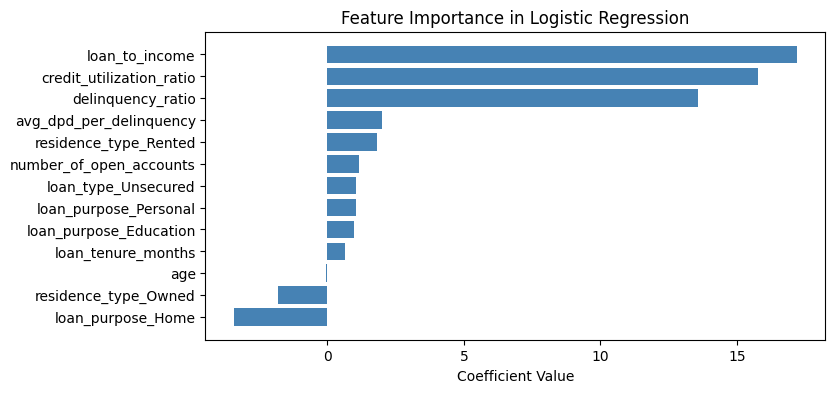

In [108]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [109]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False


In [110]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [111]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [112]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [113]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [114]:
final_model.coef_, final_model.intercept_

(array([[-0.04461846,  0.63347042,  1.16401684, 15.75893997, 17.21682082,
         13.5752857 ,  2.01743075, -1.82843484,  1.82296398,  0.97877896,
         -3.43534716,  1.03877077,  1.03877077]]),
 array([-20.52142049]))